# Task 1a Visualization

In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [2]:
# Enable autoreloading if import packages are changed
%load_ext autoreload
%autoreload 2

In [ ]:
# Set up python path 
import sys
import os
import cv2
import numpy as np 
import torch 
import matplotlib.pyplot as plt
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
# Read image
_img1 = cv2.imread("../data/CheckerWarp.png")
_color1 = cv2.cvtColor(_img1, cv2.COLOR_BGR2RGB)
_gray1 = cv2.cvtColor(_color1, cv2.COLOR_RGB2GRAY)

img1 = torch.tensor(_img1, device=device) / 255
color1 = torch.tensor(_color1, device=device) / 255
gray1 = torch.tensor(_gray1, device=device) / 255

I = gray1

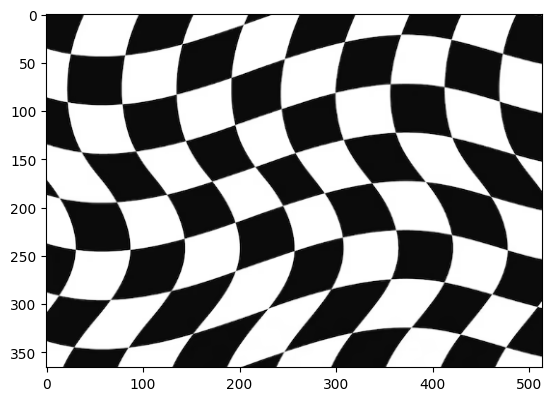

In [5]:
image_np = I.cpu().numpy()
plt.imshow(image_np, cmap='gray')

## Visualize Harris Scores

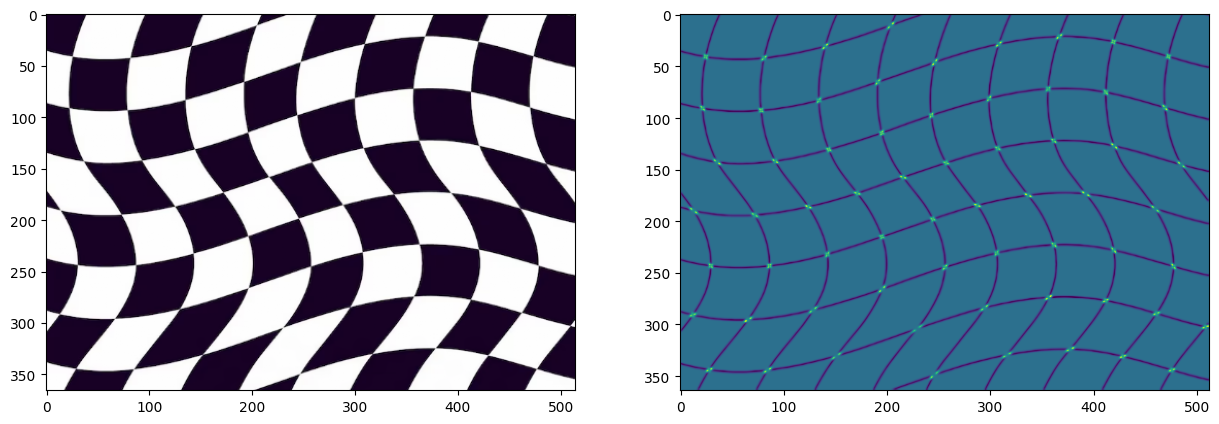

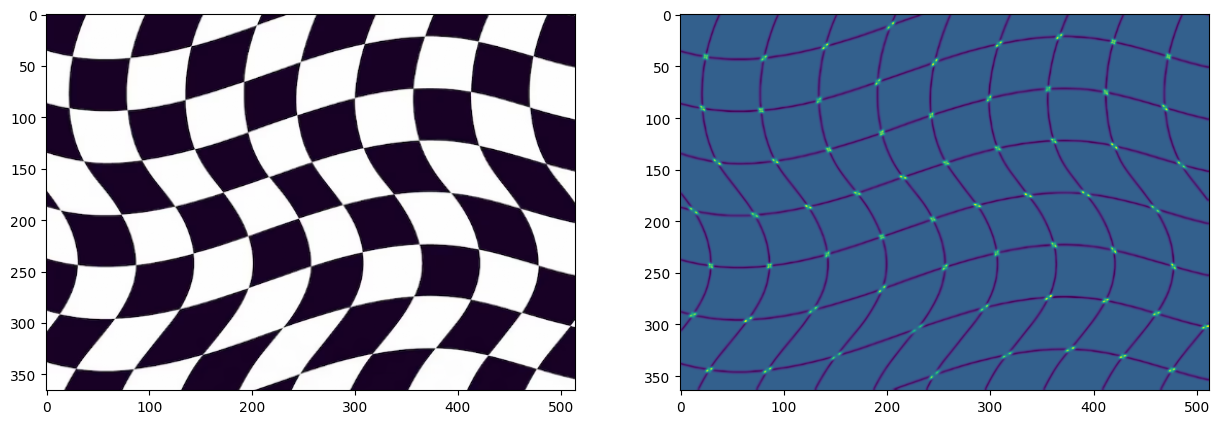

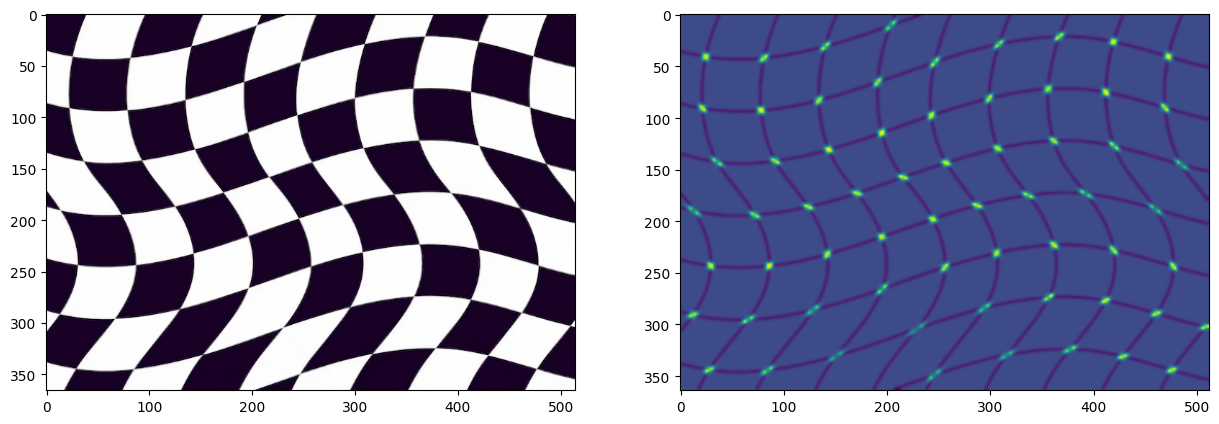

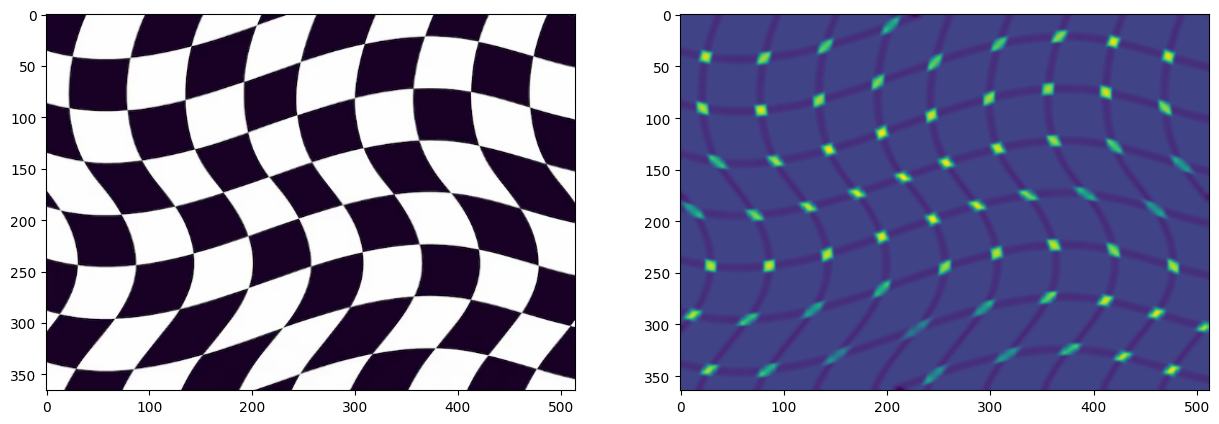

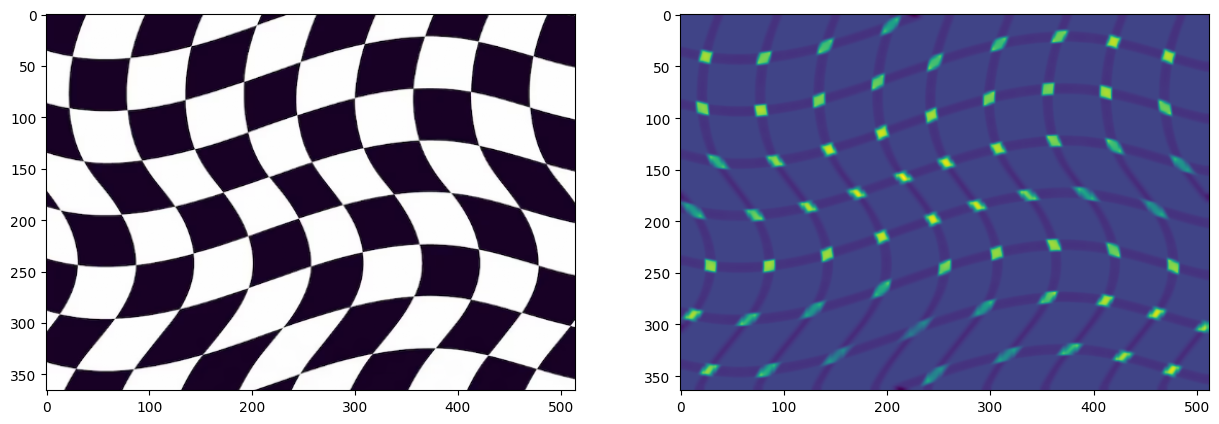

In [6]:
# Visualize scores
import harris 

h = harris.Harris()

# This loop takes a while 
# NOTE: you can turn off scrolling by going to "Cell" -> "Current Outputs" -> "Toggle Scrolling"
for sigma in [0.8, 1.0, 2.0, 5.0, 10.0]:
    R = h.compute_score(I, sigma=sigma, kernel_size=11, k=0.04)
    f = plt.figure()
    f.set_figheight(15)
    f.set_figwidth(15)
    f.add_subplot(1,2, 1)
    plt.imshow(color1.numpy())
    f.add_subplot(1,2, 2)
    plt.imshow(R.numpy() / torch.max(R))
    plt.show()

# Visualize Keypoints

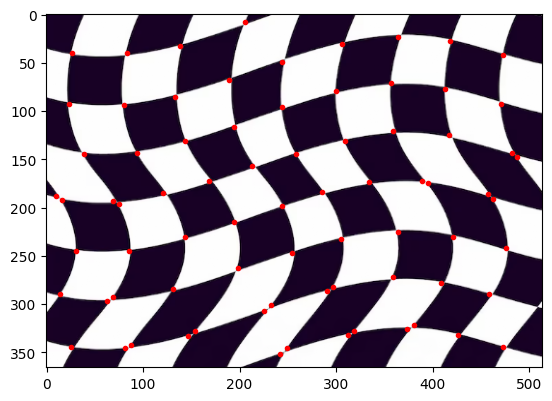

In [7]:
# Detect keypoints on test pattern

keypoints = h.detect_keypoints(I, sigma=3.0, threshold=0.3, k=0.05, window_size=11).numpy()

f = plt.figure()
plt.imshow(color1.numpy())
plt.plot(keypoints[:,1], keypoints[:,0], 'r.')

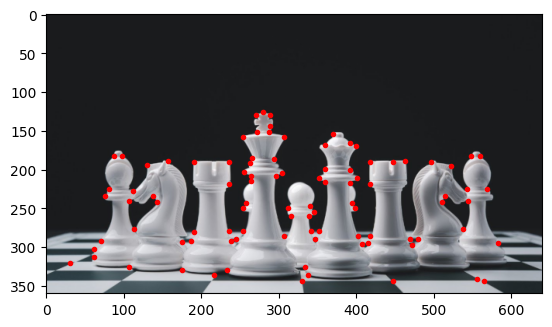

In [8]:
# Detect keypoints on real image

_img1 = cv2.imread("../data/Chess.png")
_color1 = cv2.cvtColor(_img1, cv2.COLOR_BGR2RGB)
_gray1 = cv2.cvtColor(_color1, cv2.COLOR_RGB2GRAY)

img1 = torch.tensor(_img1, device=device) / 255
color1 = torch.tensor(_color1, device=device) / 255
gray1 = torch.tensor(_gray1, device=device) / 255

I = gray1

keypoints = h.detect_keypoints(I, sigma=1.0, threshold=0.1, k=0.05, window_size=11).numpy()

f = plt.figure()
plt.imshow(color1.numpy())
plt.plot(keypoints[:,1], keypoints[:,0], 'r.')

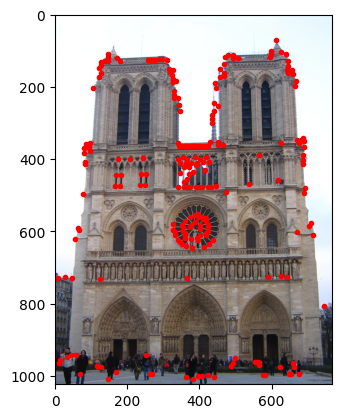

In [10]:
# Detect keypoints on real image

_img1 = cv2.imread("../data/NotreDame1.jpg")
_color1 = cv2.cvtColor(_img1, cv2.COLOR_BGR2RGB)
_gray1 = cv2.cvtColor(_color1, cv2.COLOR_RGB2GRAY)

img1 = torch.tensor(_img1, device=device) / 255
color1 = torch.tensor(_color1, device=device) / 255
gray1 = torch.tensor(_gray1, device=device) / 255

I = gray1

keypoints = h.detect_keypoints(I, sigma=3.0, threshold=0.05, k=0.05, window_size=11).numpy()

f = plt.figure()
plt.imshow(color1.numpy())
plt.plot(keypoints[:,1], keypoints[:,0], 'r.')